Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_7 (SimpleRNN)             │ (None, 50)                  │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.4770 - val_loss: 0.0158
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0089 - val_loss: 0.0014
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 7.3275e-04 - val_loss: 2.2008e-04
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.3198e-04 - val_loss: 5.9139e-05
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 5.9426e-05 - val_loss: 4.3879e-05
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4.1917e-05 - val_loss: 3.1296e-05
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3.2134e-05 - val_loss: 2.5331e-05
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.3954e-05 - val_loss: 1.9907e-05
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.9606e-05 - val_loss: 1.5092e-05
Epoch 10/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.4055e-05 - val_loss: 1.1552e-05
Epoch 11/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.1827e-05 - val_loss: 8.

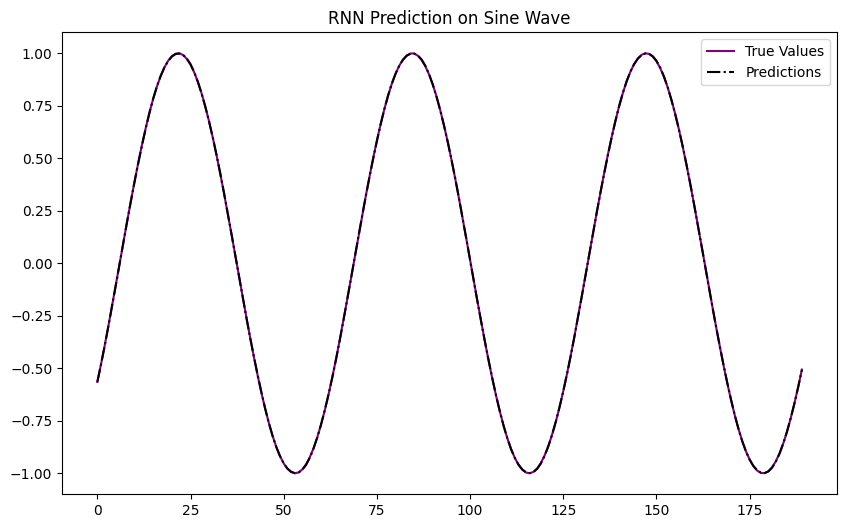

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Step 1: Generate Sine Wave Data
def generate_sine_wave_data(sequence_length=50, num_samples=1000):
    x = np.linspace(0, 100,1000)
    y = np.sin(x)
    data = []
    for i in range(len(y) - sequence_length):
        data.append(y[i:i + sequence_length + 1])
    data = np.array(data)
    return data[:, :-1], data[:, -1]

# Parameters
sequence_length = 50
x, y = generate_sine_wave_data(sequence_length)

# Split into train and test
split_index = int(0.8 * len(x))
x_train, x_test = x[:split_index], x[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Reshape for RNN: (samples, timesteps, features)
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

# Step 2: Build the RNN Model
model = Sequential([
    SimpleRNN(50, activation='tanh', input_shape=(sequence_length, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

# Step 3: Train the Model
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test))

# Step 4: Evaluate the Model
loss = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss}")

# Step 5: Make Predictions and Visualize
predictions = model.predict(x_test)
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True Values', color='purple')
plt.plot(predictions, label='Predictions', linestyle='dashdot', color='black')
plt.legend()
plt.title('RNN Prediction on Sine Wave')
plt.show()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_8 (SimpleRNN)             │ (None, 50)                  │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.1378 - val_loss: 0.0063
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0046 - val_loss: 6.7718e-04
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 4.2021e-04 - val_loss: 1.1786e-04
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 8.3312e-05 - val_loss: 6.7400e-05
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 6.6826e-05 - val_loss: 4.9126e-05
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 4.9067e-05 - val_loss: 5.3809e-05
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.4017e-05 - val_loss: 3.0797e-05
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2.9365e-05 - val_loss: 3.8930e-05
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 3.5536e-05 - val_loss: 2.4090e-05
Epoch 10/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.1655e-05 - val_loss: 1.7400e-05
Epoch 11/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.4409e-05

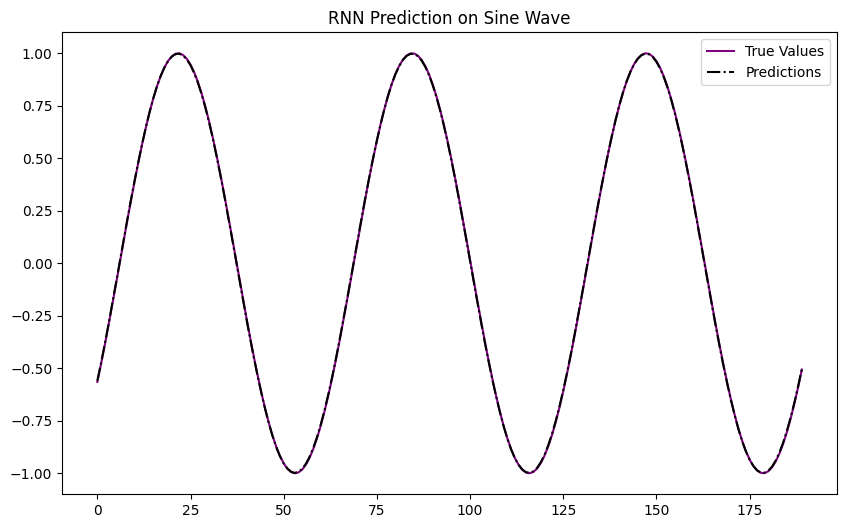

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Step 1: Generate Sine Wave Data
def generate_sine_wave_data(sequence_length=50, num_samples=1000):
    x = np.linspace(0, 100,1000)
    y = np.sin(x)
    data = []
    for i in range(len(y) - sequence_length):
        data.append(y[i:i + sequence_length + 1])
    data = np.array(data)
    return data[:, :-1], data[:, -1]

# Parameters
sequence_length = 50
x, y = generate_sine_wave_data(sequence_length)

# Split into train and test
split_index = int(0.8 * len(x))
x_train, x_test = x[:split_index], x[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Reshape for RNN: (samples, timesteps, features)
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

# Step 2: Build the RNN Model
model = Sequential([
    SimpleRNN(50, activation='tanh', input_shape=(sequence_length, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

# Step 3: Train the Model
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test))

# Step 4: Evaluate the Model
loss = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss}")

# Step 5: Make Predictions and Visualize
predictions = model.predict(x_test)
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True Values', color='purple')
plt.plot(predictions, label='Predictions', linestyle='dashdot', color='black')
plt.legend()
plt.title('RNN Prediction on Sine Wave')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense


def generate_sine_wave_data(sequence_length = 50, number_samples= 1000)
    x = np.linespace(0,100,1000)
    y= np.sin(x)
    data = []
    for i in range(len(y) - sequence_length):
        data.append(y[i:i + sequence_length + 1])
    data = np.array(data)
    return data[:, :-1], data[:, -1]


    sequence_length = 50

